In [6]:
import h5py
import numpy as np
import pickle
import glob
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

layer_feature_dist_all = []
objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
for oo in objects:
    if oo == 'car':
        filename = '/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_{0}_train_bg.mat'.format(oo)
    else:
        filename = '/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_{0}_train.mat'.format(oo)
        
    print(filename)
    f = h5py.File(filename)
    dic1 = f['res_info']
    len1 = dic1.shape[0]
    
    layer_feature_dist = [None for nn in range(len1)]
    for nn in range(len1):
        dic2 = f[dic1[nn,0]]
        dic21 = dic2["layer_feature_dist"]
        dic21 = np.array(dic21)
        layer_feature_dist[nn] = dic21
        
    layer_feature_dist_all = layer_feature_dist_all + layer_feature_dist
    

print(len(layer_feature_dist_all))
    

/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_car_train_bg.mat
/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_aeroplane_train.mat
/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_bicycle_train.mat
/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_bus_train.mat
/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_motorbike_train.mat
/media/zzs/4TB/qingliu/qing_intermediate/all_K216_res_info/res_info_train_train.mat
3170


In [7]:
N=len(layer_feature_dist_all)
magic_thh = 0.7

layer_feature_b = [None for nn in range(N)]
for nn in range(N):
    layer_feature_b[nn] = (layer_feature_dist_all[nn]<magic_thh).astype(int)
    

In [8]:
# VC num
max_0 = max([layer_feature_b[nn].shape[0] for nn in range(N)])

# width
max_1 = max([layer_feature_b[nn].shape[1] for nn in range(N)])

# height
max_2 = max([layer_feature_b[nn].shape[2] for nn in range(N)])
print(max_0, max_1, max_2)

216 56 37


0.00896383923356
0.001


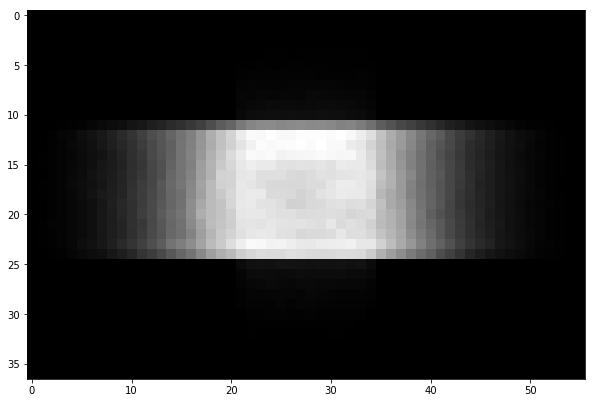

In [9]:
all_bg_b = np.zeros((max_0, max_1, max_2))
for nn in range(N):
    vnum, ww, hh = layer_feature_b[nn].shape
    assert(vnum == max_0)
    diff_w1 = int((max_1-ww)/2)
    diff_w2 = int(max_1-ww-diff_w1)
    assert(max_1 == diff_w1+diff_w2+ww)
    
    diff_h1 = int((max_2-hh)/2)
    diff_h2 = int(max_2-hh-diff_h1)
    assert(max_2 == diff_h1+diff_h2+hh)
    
    padded = np.pad(layer_feature_b[nn], ((0,0),(diff_w1, diff_w2),(diff_h1, diff_h2)), 'constant', constant_values=0)
    all_bg_b += np.pad(layer_feature_b[nn], ((0,0),(diff_w1, diff_w2),(diff_h1, diff_h2)), 'constant', constant_values=0)
    
probs = all_bg_b/N + 1e-3

mean_acr_vc = np.mean(probs, axis=0)
print(np.max(mean_acr_vc))
print(np.min(mean_acr_vc))
from matplotlib import pyplot as plt
plt.close()
fig, ax = plt.subplots()
ax.imshow(mean_acr_vc.T)
plt.show()

In [10]:
weights = np.log(probs/(1.-probs))
weights.shape
import scipy.io as sio

sio.savemat('/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/all_train_bg2.mat', mdict={'weight': weights})

In [46]:
!pwd

/home/qin/voting/qing_clustering
